**Name:** SIVAKUMAR Srinivas

**EID:** ssivakuma2

# CS4487 - Tutorial 10
## Using Deep Features

In this tutorial you will train a classifier to classify images with different types of cakes using deep features.

First we need to initialize Python.  Run the below cell.

In [1]:
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
import os
import zipfile
import fnmatch

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
D:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklear

Second, initialize Keras and Tensorflow

In [2]:
# use TensorFlow backend
%env KERAS_BACKEND=tensorflow     
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, Conv2D, Flatten, \
                Input, GlobalAveragePooling2D
from keras.preprocessing import image

import keras
import tensorflow
import logging
logging.basicConfig()
import struct

# use channels first representation for images
from keras import backend as K
K.set_image_data_format('channels_first')

from keras.callbacks import TensorBoard

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


## 1. Loading Data and Pre-processing
Next we need to load the images.  Download `cakes.zip`, and put it in the same direcotry as this ipynb file.  **Do not unzip the file.** Then run the following cell to load the images.

In [3]:
imgdata = []
classes = []

# load the zip file
filename = 'cakes.zip'
zfile = zipfile.ZipFile(filename, 'r')

for name in zfile.namelist():
    # check file name matches
    if fnmatch.fnmatch(name, "cakes/*/*.jpg"):
        
        # filename is : cakes/class/file.jpg
        (fdir1, fname)  = os.path.split(name)  # get file name
        (fdir2, fclass) = os.path.split(fdir1) # get class 

        # open file in memory, and parse as an image
        myfile = zfile.open(name)
        #img = matplotlib.image.imread(myfile)
      #  img = skimage.io.imread(myfile)
        img = image.load_img(myfile, target_size=(224, 224))
        
        myfile.close()

        imgdata.append(img)
        classes.append(fclass)
        
zfile.close()
print(len(imgdata))
print(img.size)

800
(224, 224)


Each image is a 224x224. There are 8 classes of differerent cakes.  Run the below code to show examples of each class.

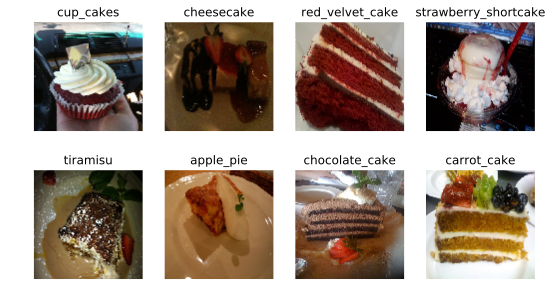

In [4]:
plt.figure(figsize=(9,5))
for i in range(8):
    plt.subplot(2,4,i+1)
    ind = i*100
    plt.imshow(imgdata[ind])    
    plt.title(classes[ind])
    plt.axis('off')
plt.show()

Next, we convert the class label strings into class numbers.

In [5]:
# convert class strings into integers
print("class labels (strings):", unique(classes))
le = preprocessing.LabelEncoder()
Y = le.fit_transform(classes)
print("Converted labels:")
print(Y)

class labels (strings): ['apple_pie' 'carrot_cake' 'cheesecake' 'chocolate_cake' 'cup_cakes'
 'red_velvet_cake' 'strawberry_shortcake' 'tiramisu']
Converted labels:
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7
 7 7 7 7 7

## 2. Extract Deep features
Now preprocess the images in imdata and put them into a 4D tensor for ResNet.  The tensor is `Xim`.

In [6]:
### INSERT YOUR CODE HERE ###
import keras.applications.resnet50 as resnet
from keras.preprocessing import image

In [7]:
Xim = zeros((len(imgdata), 3, 224, 224))
for i,img in enumerate(imgdata):
    x = image.img_to_array(img)
    x = expand_dims(x, axis=0)
    x = resnet.preprocess_input(x)
    Xim[i,:] = x

In [8]:
print(Xim.shape)

(800, 3, 224, 224)


Extract features from Resnet50, call it `Xf`.

In [9]:
model_f = resnet.ResNet50(weights='imagenet', include_top=False, pooling='avg')

C:\Users\srini\AppData\Roaming\Python\Python36\site-packages\keras\applications\resnet50.py:281: UserWarning: You are using the TensorFlow backend, yet you are using the Theano image data format convention (`image_data_format="channels_first"`). For best performance, set `image_data_format="channels_last"` in your Keras config at ~/.keras/keras.json.
  warnings.warn('You are using the TensorFlow backend, yet you '


In [10]:
Xf = model_f.predict(Xim)
print(Xf.shape)

(800, 2048)


## 3. Train a classifier
Split the data into training and testing for the classifier.

In [11]:
# randomly split data into train and test set
( trainXf, testXf,       # features 
  trainY, testY,         # class labels
  trainimgdata, testimgdata,     # raw images
) = \
  model_selection.train_test_split(Xf, Y, imgdata,
  train_size=0.8, test_size=0.2, random_state=4487)

print(trainXf.shape)
print(testXf.shape)

(640, 2048)
(160, 2048)


Now train a few traditional classifier (e.g, SVM, logistic regression, random forest, etc.) and compute the accuracy.

In [ ]:
### INSERT YOUR CODE HERE ###

In [14]:
paramgrid ={'C': logspace(-3,3,13) }
svmcv = model_selection.GridSearchCV(svm.SVC(kernel='linear'),paramgrid, cv = 5,verbose = 1)
svmcv.fit(trainXf,trainY)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:  2.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-03, 3.16228e-03, 1.00000e-02, 3.16228e-02, 1.00000e-01,
       3.16228e-01, 1.00000e+00, 3.16228e+00, 1.00000e+01, 3.16228e+01,
       1.00000e+02, 3.16228e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [15]:
predY_svm = svmcv.predict(testXf)
acc = metrics.accuracy_score(testY, predY_svm)
print("svm test accuracy =", acc)

svm test accuracy = 0.6625


In [16]:
logreg = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=5)
logreg.fit(trainXf,trainY)

LogisticRegressionCV(Cs=array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04]),
           class_weight=None, cv=5, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [17]:
predY_lr = logreg.predict(testXf)
acc = metrics.accuracy_score(testY, predY_lr)
print("svm test accuracy =", acc)

svm test accuracy = 0.725


In [22]:
paramgrid ={'n_estimators': [5,10,20,50,100,500,1000] }
clf = model_selection.GridSearchCV(ensemble.RandomForestClassifier(n_estimators=4, random_state=4487, n_jobs=-1),paramgrid, cv = 5,verbose = 1)
clf.fit(trainXf,trainY)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   32.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=-1,
            oob_score=False, random_state=4487, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [23]:
predY_rf = clf.predict(testXf)
acc = metrics.accuracy_score(testY, predY_rf)
print("svm test accuracy =", acc)

svm test accuracy = 0.61875


In [24]:
mypred = predY_lr

# 4. Analyze results

Run the below code to visualize the predictions on the test set.  `mypred` are the class predictions from your classifier.

In [25]:
# get the class labels

predYcl = le.inverse_transform(mypred)
testYcl = le.inverse_transform(testY)

plt.figure(figsize=(10,50))
px = 8
py = ceil(len(predYcl)/5)
for i in range(len(predYcl)):
    plt.subplot(py,px,i+1)
    mytitle = predYcl[i] + "\n(" + testYcl[i] + ")" 
    plt.imshow(testimgdata[i], interpolation='nearest')
    plt.title(mytitle, size=8)
    plt.gca().set_axis_off()

    

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Now look at the confusion matrix

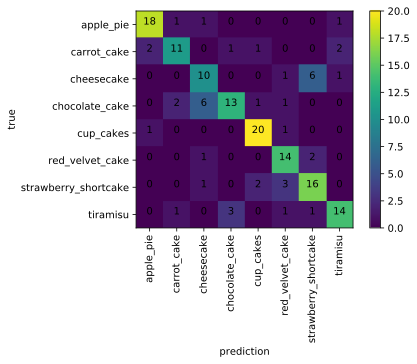

In [26]:
CM = metrics.confusion_matrix(testY, mypred)

plt.imshow(CM, interpolation='nearest')
plt.colorbar()

tick_marks = arange(len(le.classes_))
plt.xticks(tick_marks, le.classes_, rotation=90)
plt.yticks(tick_marks, le.classes_)
plt.xlabel('prediction')
plt.ylabel('true')
for i in range(len(le.classes_)):
    for j in range(len(le.classes_)):
        plt.text(j,i,"{}".format(CM[i,j]), horizontalalignment='center')

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


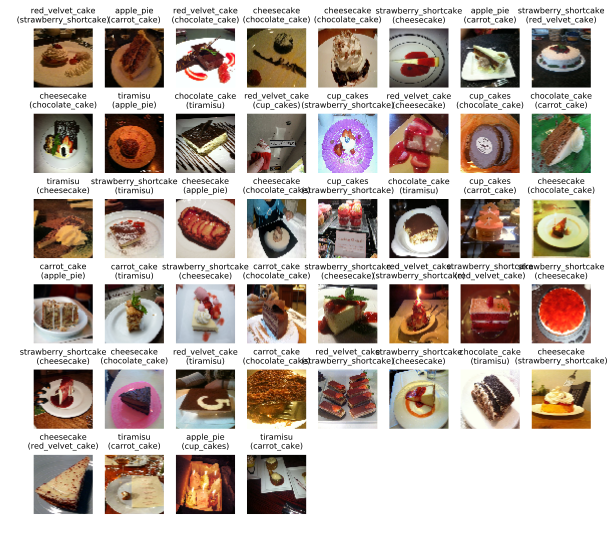

In [27]:
# modifying function to print only falsely classified results
predYcl = le.inverse_transform(mypred)
testYcl = le.inverse_transform(testY)

plt.figure(figsize=(10,50))
px = 8
py = ceil(len(predYcl)/5)
ctr = 1;
for i in range(len(predYcl)):
    if predYcl[i] != testYcl[i]:
        plt.subplot(py,px,ctr)
        ctr += 1
        mytitle = predYcl[i] + "\n(" + testYcl[i] + ")" 
        plt.imshow(testimgdata[i], interpolation='nearest')
        plt.title(mytitle, size=8)
        plt.gca().set_axis_off()

    

_How does the classifier make errors?_
- The primary feature selected by the classifier seems to be colour. Most of the cakes which were misclassified were either because the overall image quality was poor or because the cakes contained some sort of icing or syrup on top.

## 5. More experiments

- If you have time, you can try using other networks (e.g., InceptionNet) to extract the features.
  - remember to change the pre-processing step too.
- Or you can fine-tune the existing network to see if you can get better performance.